In [12]:
%matplotlib notebook
import requests
import json, time, datetime, math
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal, fftpack

#helper functions
def print_time(unix, msg=''):
    print(msg, time.ctime(int(unix)))
    
def get_readable_time(unix):
    return [time.ctime(int(u)) for u in unix]

def plot_corr(df):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(9,9))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    fig.show()

DATA_SOURCE = 'poloniex'
DATA_PATH = 'data/' + DATA_SOURCE + '/'
if DATA_SOURCE == 'poloniex':
    df_btc = pd.read_pickle(DATA_PATH + 'USDT_BTC.pkl')
    df_ltc = pd.read_pickle(DATA_PATH + 'USDT_LTC.pkl')
    df_eth = pd.read_pickle(DATA_PATH + 'USDT_ETH.pkl')
    df_xrp = pd.read_pickle(DATA_PATH + 'USDT_XRP.pkl')
else:
    data_df = pd.read_pickle(DATA_PATH + 'bitcoin.pkl')
    data_df_ltc = pd.read_pickle(DATA_PATH + 'litecoin.pkl')
    data_df_cap = pd.read_pickle(DATA_PATH + 'marketcap-total.pkl')



In [3]:
print("###BITCOIN")
#print(df_btc.describe())
print(df_btc.corr())

print("###LITECOIN")
#print(df_ltc.describe())
print(df_ltc.corr())

print("###ETHEREUM")
#print(df_eth.describe())
print(df_eth.corr())

print("###RIPPLE")
#print(df_xrp.describe())
print(df_xrp.corr())

"""
price_usd = data_df['price_usd'][0::100]
market_cap = data_df['market_cap'][0::100]
volume = data_df['volume_usd'][0::100]

fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(range(len(price_usd)), price_usd, label='Cena USD')
axes.plot(range(len(volume)), volume, label='Volume')
fig.show()
"""
#plt.plot(range(len(price_usd)), price_usd, label='Cena USD')
#plt.plot(range(len(market_cap)), market_cap, label='Market Cap')
#plt.plot(range(len(volume)), volume, label='Volume')
#plt.legend()
#plt.show()

###BITCOIN
                    close      date  quoteVolume    volume  weightedAverage
close            1.000000  0.722483     0.244877  0.554349         0.999994
date             0.722483  1.000000     0.381820  0.415729         0.722492
quoteVolume      0.244877  0.381820     1.000000  0.711897         0.244877
volume           0.554349  0.415729     0.711897  1.000000         0.554357
weightedAverage  0.999994  0.722492     0.244877  0.554357         1.000000
###LITECOIN
                    close      date  quoteVolume    volume  weightedAverage
close            1.000000  0.667166     0.099798  0.362772         0.999991
date             0.667166  1.000000     0.233970  0.288897         0.667145
quoteVolume      0.099798  0.233970     1.000000  0.641312         0.099709
volume           0.362772  0.288897     0.641312  1.000000         0.362579
weightedAverage  0.999991  0.667145     0.099709  0.362579         1.000000
###ETHEREUM
                    close      date  quoteVolume    v

"\nprice_usd = data_df['price_usd'][0::100]\nmarket_cap = data_df['market_cap'][0::100]\nvolume = data_df['volume_usd'][0::100]\n\nfig = plt.figure()\naxes = fig.add_subplot(111)\naxes.plot(range(len(price_usd)), price_usd, label='Cena USD')\naxes.plot(range(len(volume)), volume, label='Volume')\nfig.show()\n"

In [4]:
print(df_btc.describe())
print(70*'#')
print(df_ltc.describe())
print(70*'#')
print(df_eth.describe())
print(70*'#')
print(df_xrp.describe())

               close          date    quoteVolume        volume  \
count  327505.000000  3.275050e+05  327505.000000  3.275050e+05   
mean     2355.886818  1.473499e+09      12.714330  5.951428e+04   
std      3681.958009  2.836281e+07      32.789575  1.796844e+05   
min        99.000000  1.424373e+09       0.000000  0.000000e+00   
25%       371.000000  1.448936e+09       0.000000  0.000000e+00   
50%       645.198657  1.473499e+09       0.391221  2.454578e+02   
75%      2457.052952  1.498061e+09      11.732144  4.044794e+04   
max     19896.687300  1.522624e+09    1244.437950  8.905612e+06   

       weightedAverage  
count    327505.000000  
mean       2355.764074  
std        3681.758228  
min           0.000000  
25%         371.000000  
50%         645.263995  
75%        2456.965424  
max       19888.009976  
######################################################################
               close          date    quoteVolume        volume  \
count  322867.000000  3.228670e+0

<IPython.core.display.Javascript object>


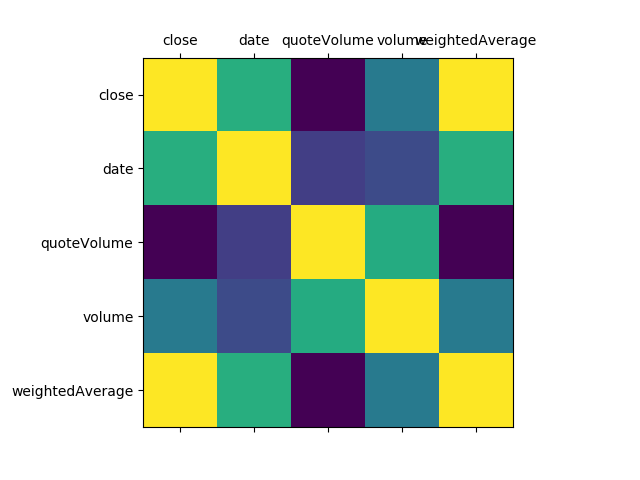

In [27]:
plot_corr(df_btc)

<IPython.core.display.Javascript object>


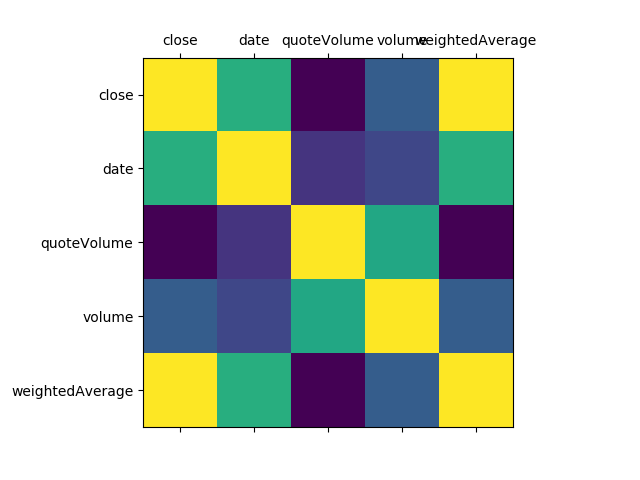

In [28]:
plot_corr(df_ltc)

<IPython.core.display.Javascript object>


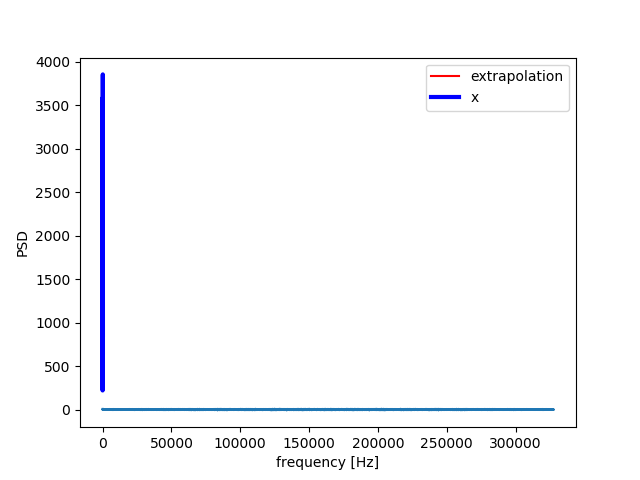

c:\users\deyan\tf-workspace\env\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [31]:
procent_change_btc = df_btc['close'].pct_change()[1:-1]
procent_change_ltc = df_ltc['close'].pct_change()[1:-1]

#f = fftpack.fft(df_btc['close'].diff()[1:])
f = fftpack.fft(procent_change_btc)
plt.plot(f)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()

In [19]:
df_btc['close'].diff()

0               NaN
1          0.000000
2          0.000000
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11         0.000000
12         0.000000
13         0.000000
14        15.000000
15         0.000000
16         0.000000
17         0.000000
18         0.000000
19         4.000000
20         0.000000
21         0.000000
22         0.000000
23         0.000000
24         0.000000
25         0.000000
26         0.000000
27         0.000000
28         0.000000
29         0.000000
            ...    
327475     8.534067
327476     1.742287
327477   -12.759056
327478    -8.228054
327479    -6.987187
327480    23.957192
327481    -8.563537
327482    14.169670
327483   -15.804138
327484   -59.452798
327485   -10.349197
327486    -8.000000
327487    -5.118442
327488    18.659467
327489   -13.920569
327490    27.530740
327491    -4.151196
327492   -18.594591
327493    -3.726666


In [39]:
idx = -600

btc_time = df_btc['date'].tolist()
ltc_time = df_ltc['date'].tolist()
print_time(btc_time[idx])
print_time(ltc_time[idx])

 Sun Mar 25 08:20:00 2018
 Sun Mar 25 08:20:00 2018


In [33]:
#combine all dataframes into one with size of smallest dataframe - discard every other value
count = [min(df_btc.count(numeric_only=True)), min(df_ltc.count(numeric_only=True)), min(df_eth.count(numeric_only=True)), min(df_xrp.count(numeric_only=True))]
count = min(count)

df_btc = df_btc.add_prefix('btc_')
df_eth = df_eth.add_prefix('eth_')
df_ltc = df_ltc.add_prefix('ltc_')
df_xrp = df_xrp.add_prefix('xrp_')

df_all = pd.concat([df_btc.iloc[-count:].reset_index(drop=True), df_eth.iloc[-count:].reset_index(drop=True), df_ltc.iloc[-count:].reset_index(drop=True), df_xrp.iloc[-count:].reset_index(drop=True)], axis=1)
df_all.count(numeric_only=True)

#cuz date column is same for every currency, we will discard others
df_all.head()
df_all['date'] = df_all['btc_date']
df_all = df_all.drop(columns=['btc_date', 'ltc_date', 'eth_date', 'xrp_date'])
df_all.to_pickle(DATA_PATH + 'combined.pkl')

<IPython.core.display.Javascript object>


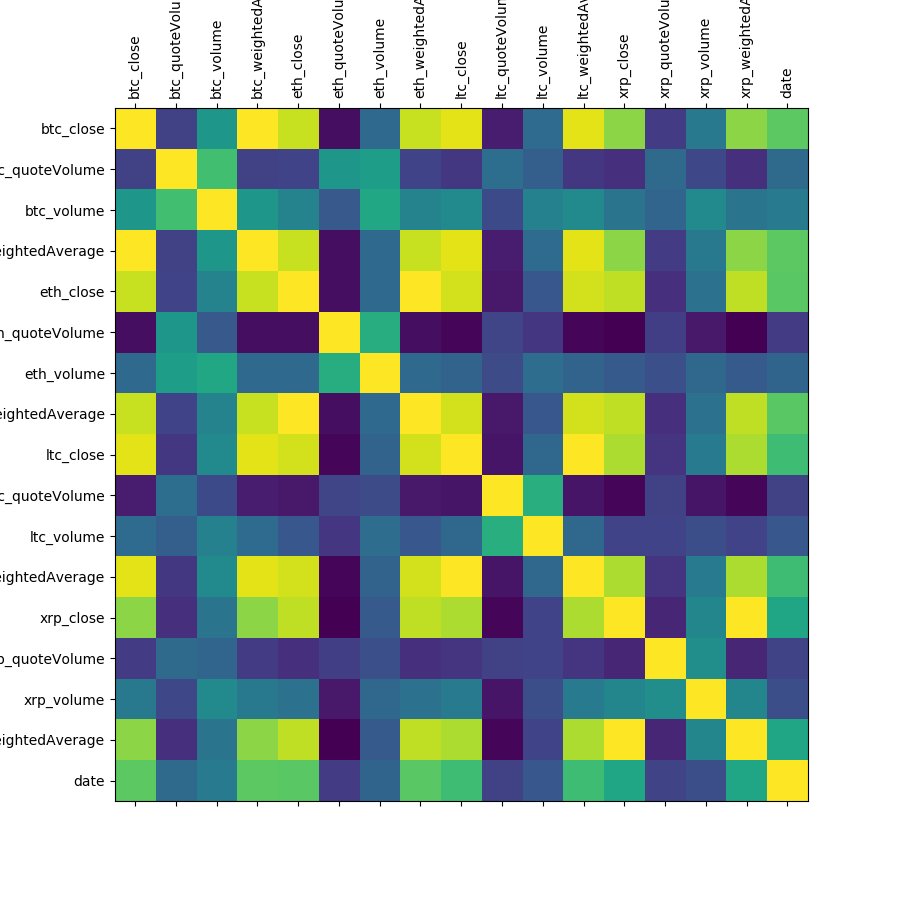

In [34]:
plot_corr(df_all)

In [24]:
plt.boxplot(procent_change_btc)

{'boxes': [<matplotlib.lines.Line2D at 0x1ea020970b8>],
 'caps': [<matplotlib.lines.Line2D at 0x1ea02097c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ea0212df60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1ea04d7fd30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1ea02097400>,
  <matplotlib.lines.Line2D at 0x1ea02097828>]}

In [47]:
df_all['btc_close'].as_matrix()[500:700]

(200,)

<IPython.core.display.Javascript object>


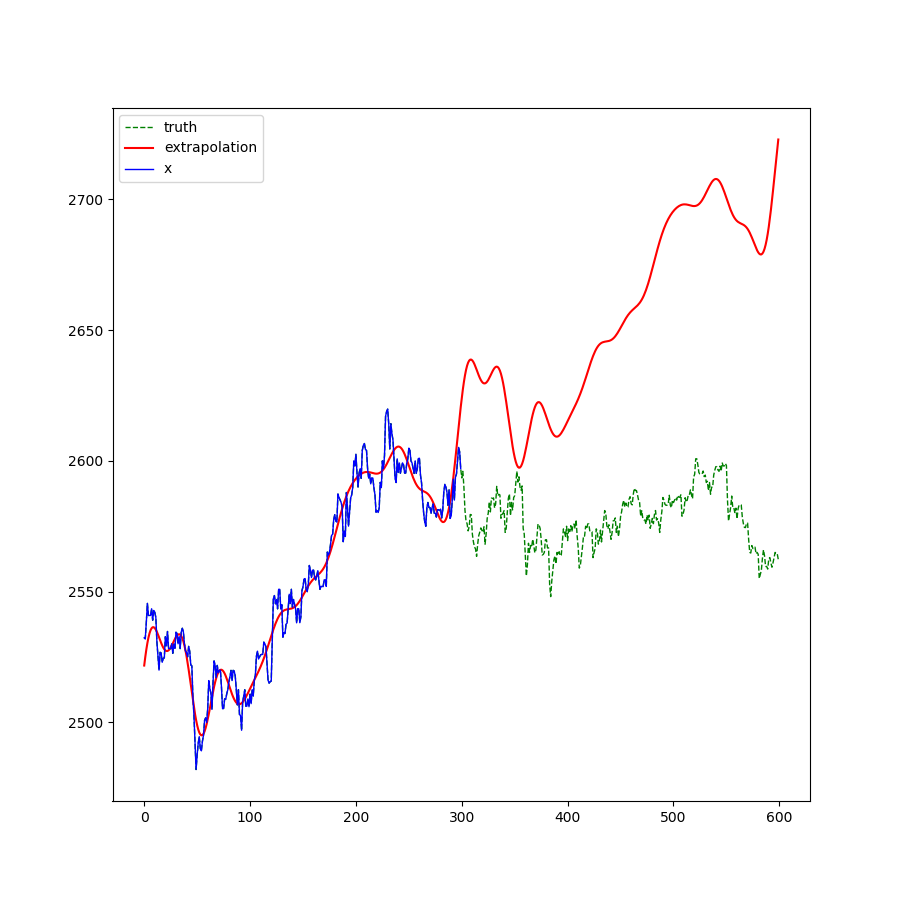

In [64]:
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fftpack.fft(x_notrend)  # detrended x in frequency domain
    f = fftpack.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    

x = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])
start = 200700
interval = 300
n_predict = 300
#print(x.shape)
x = df_all['btc_close'].as_matrix()[start:start+interval]
y = df_all['btc_close'].as_matrix()[start:start+interval+n_predict]
extrapolation = fourierExtrapolation(x, n_predict)
fig, ax = plt.subplots(figsize=(9,9))
plt.plot(np.arange(0, y.size), y, 'g--', label = 'truth', linewidth = 1)
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
plt.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 1)

plt.legend()
fig.show()